In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from sklearn.cross_validation import train_test_split

C:\Users\Srini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn import metrics

In [7]:
data=pd.read_csv('Real estate.csv')

In [8]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [9]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [10]:
data.columns = ['No', 'X1_transaction_date', 'X2_house_age',
       'X3_distance_to_the_nearest_MRT_station',
       'X4_number_of_convenience_stores', 'X5_latitude', 'X6_longitude',
       'Y_house_price_of_unit_area']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1_transaction_date                       414 non-null float64
X2_house_age                              414 non-null float64
X3_distance_to_the_nearest_MRT_station    414 non-null float64
X4_number_of_convenience_stores           414 non-null int64
X5_latitude                               414 non-null float64
X6_longitude                              414 non-null float64
Y_house_price_of_unit_area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
date_dummy=pd.get_dummies(data.X1_transaction_date)

In [13]:
date_dummy

,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,0,0


In [14]:
data_copy=data.drop(['X1_transaction_date'],axis=1)

In [15]:
data_copy=pd.concat([data_copy,date_dummy],axis=1,sort=False)

In [16]:
data_copy

,No,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
0,1,32.0,84.87882,10,24.98298,121.54024,37.9,0,0,0,1,0,0,0,0,0,0,0,0
1,2,19.5,306.59470,9,24.98034,121.53951,42.2,0,0,0,1,0,0,0,0,0,0,0,0
2,3,13.3,561.98450,5,24.98746,121.54391,47.3,0,0,0,0,0,0,0,0,0,0,0,1
3,4,13.3,561.98450,5,24.98746,121.54391,54.8,0,0,0,0,0,0,0,0,0,0,1,0
4,5,5.0,390.56840,5,24.97937,121.54245,43.1,0,0,1,0,0,0,0,0,0,0,0,0
5,6,7.1,2175.03000,3,24.96305,121.51254,32.1,1,0,0,0,0,0,0,0,0,0,0,0
6,7,34.5,623.47310,7,24.97933,121.53642,40.3,1,0,0,0,0,0,0,0,0,0,0,0
7,8,20.3,287.60250,6,24.98042,121.54228,46.7,0,0,0,0,0,0,0,0,0,1,0,0
8,9,31.7,5512.03800,1,24.95095,121.48458,18.8,0,0,0,0,0,0,0,0,0,0,1,0
9,10,17.9,1783.18000,3,24.96731,121.51486,22.1,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 19 columns):
No                                        414 non-null int64
X2_house_age                              414 non-null float64
X3_distance_to_the_nearest_MRT_station    414 non-null float64
X4_number_of_convenience_stores           414 non-null int64
X5_latitude                               414 non-null float64
X6_longitude                              414 non-null float64
Y_house_price_of_unit_area                414 non-null float64
2012.6670000000001                        414 non-null uint8
2012.75                                   414 non-null uint8
2012.8329999999999                        414 non-null uint8
2012.9170000000001                        414 non-null uint8
2013.0                                    414 non-null uint8
2013.0829999999999                        414 non-null uint8
2013.1670000000001                        414 non-null uint8
2013.25                        

In [18]:
data_copy.drop(['No'],axis=1,inplace=True)

In [19]:
data_copy.describe()

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193,0.072464,0.065217,0.074879,0.091787,0.067633,0.111111,0.060386,0.077295,0.070048,0.140097,0.113527,0.055556
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488,0.259568,0.247208,0.263515,0.289075,0.251419,0.314650,0.238490,0.267382,0.255537,0.347507,0.317619,0.229339
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
min_X = MinMaxScaler()
data_copy.X3_distance_to_the_nearest_MRT_station = min_X.fit_transform(data_copy[['X3_distance_to_the_nearest_MRT_station']])

In [21]:
data_copy.describe()

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,0.164047,4.094203,24.969030,121.533361,37.980193,0.072464,0.065217,0.074879,0.091787,0.067633,0.111111,0.060386,0.077295,0.070048,0.140097,0.113527,0.055556
std,11.392485,0.195233,2.945562,0.012410,0.015347,13.606488,0.259568,0.247208,0.263515,0.289075,0.251419,0.314650,0.238490,0.267382,0.255537,0.347507,0.317619,0.229339
min,0.000000,0.000000,0.000000,24.932070,121.473530,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.025000,0.041138,1.000000,24.963000,121.528085,27.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.100000,0.072525,4.000000,24.971100,121.538630,38.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.150000,0.221342,6.000000,24.977455,121.543305,46.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,43.800000,1.000000,10.000000,25.014590,121.566270,117.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


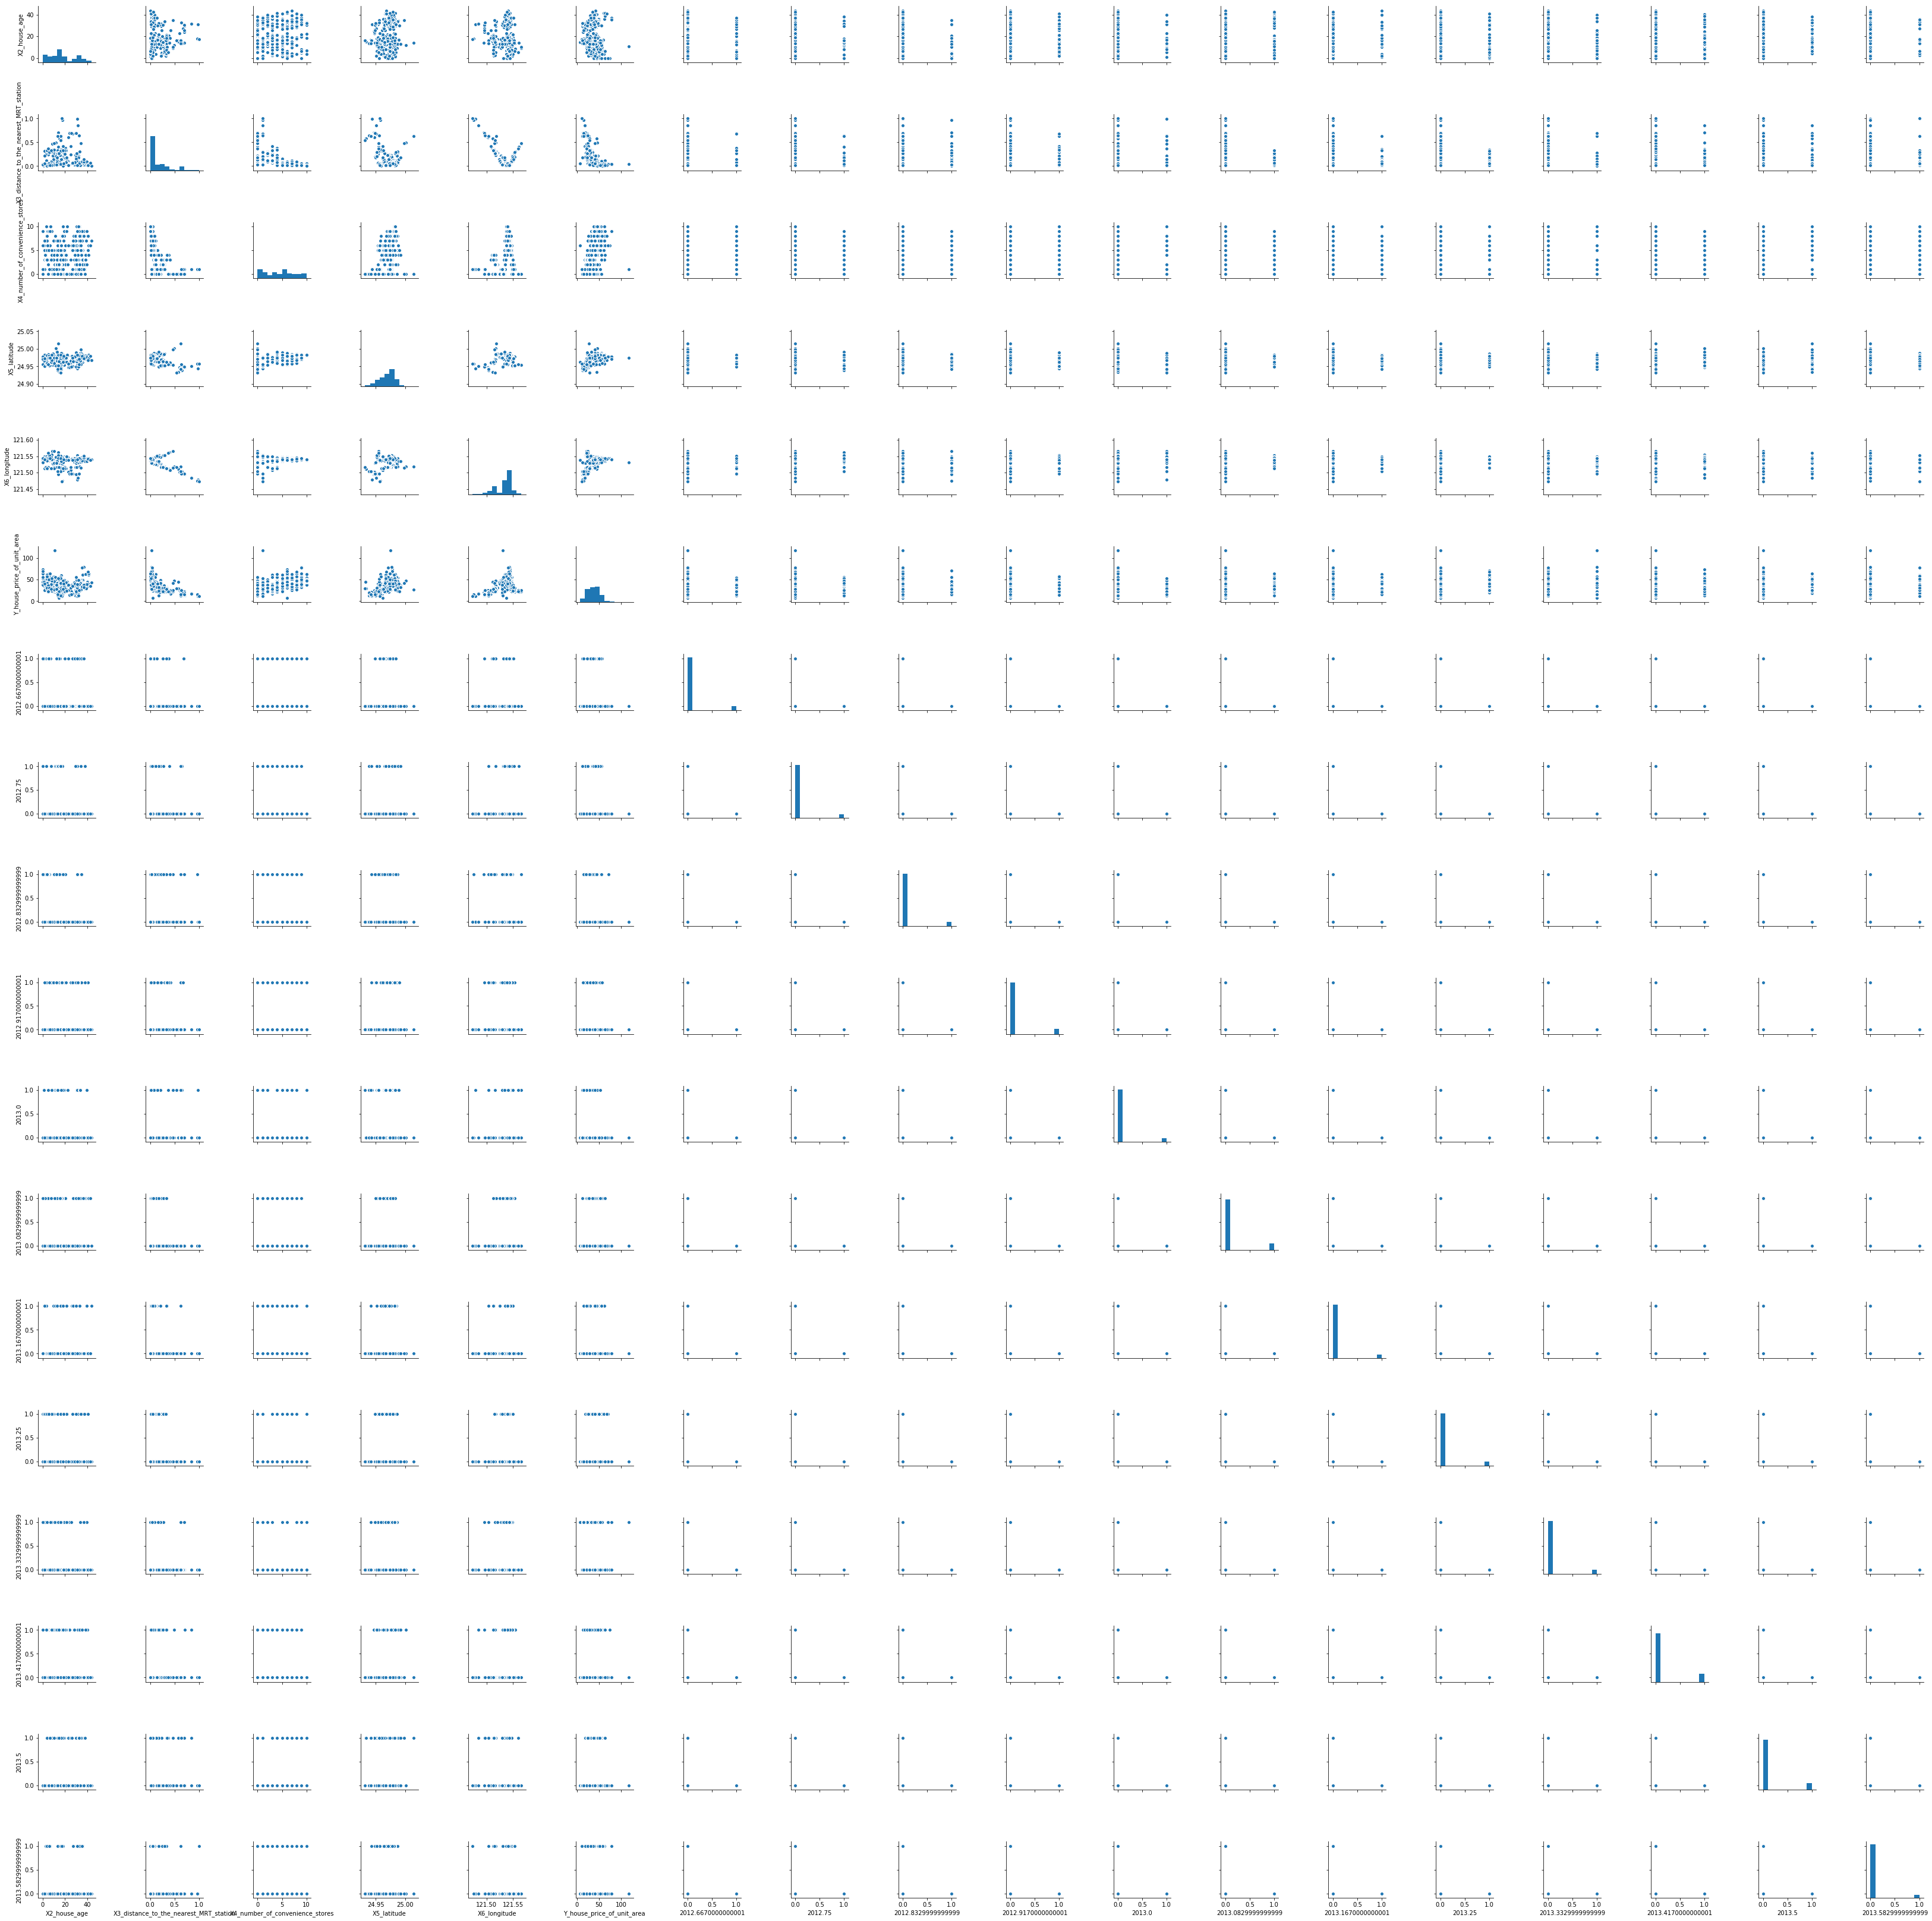

In [22]:
sb.pairplot(data_copy)

In [23]:
data_copy.corr()

,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area,2012.6670000000001,2012.75,2012.8329999999999,2012.9170000000001,2013.0,2013.0829999999999,2013.1670000000001,2013.25,2013.3329999999999,2013.4170000000001,2013.5,2013.5829999999999
X2_house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.022372,-0.050759,-0.112746,0.047733,0.002408,0.098228,0.027792,-0.006996,-0.027916,-0.032004,-0.039206,0.074520
X3_distance_to_the_nearest_MRT_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,-0.043776,-0.011104,0.052733,-0.025592,0.127889,-0.126710,-0.020352,-0.094699,-0.023027,-0.024050,0.171923,0.022394
X4_number_of_convenience_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,0.086056,-0.028409,-0.093335,0.041006,-0.119788,-0.000871,0.029797,0.058368,0.023380,0.055674,-0.073572,0.013740
X5_latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.030516,-0.026023,-0.017142,-0.002459,-0.188063,0.054974,0.007075,0.054404,0.015818,0.108486,-0.068979,-0.010210
X6_longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,-0.001393,0.038593,-0.077769,0.018141,-0.000628,0.079188,-0.003597,0.056725,0.037197,0.002473,-0.141631,0.007075
Y_house_price_of_unit_area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,0.011582,-0.046621,-0.048072,-0.056664,-0.137202,0.065385,0.006040,0.070569,0.072337,0.014056,0.003659,0.028986
2012.6670000000001,0.022372,-0.043776,0.086056,0.030516,-0.001393,0.011582,1.000000,-0.073828,-0.079520,-0.088857,-0.075280,-0.098821,-0.070858,-0.080898,-0.076712,-0.112819,-0.100026,-0.067791
2012.75,-0.050759,-0.011104,-0.028409,-0.026023,0.038593,-0.046621,-0.073828,1.000000,-0.075146,-0.083970,-0.071140,-0.093386,-0.066961,-0.076449,-0.072493,-0.106614,-0.094524,-0.064062
2012.8329999999999,-0.112746,0.052733,-0.093335,-0.017142,-0.077769,-0.048072,-0.079520,-0.075146,1.000000,-0.090444,-0.076624,-0.100586,-0.072123,-0.082343,-0.078082,-0.114834,-0.101812,-0.069001
2012.9170000000001,0.047733,-0.025592,0.041006,-0.002459,0.018141,-0.056664,-0.088857,-0.083970,-0.090444,1.000000,-0.085622,-0.112397,-0.080592,-0.092011,-0.087250,-0.128318,-0.113766,-0.077103


In [24]:
independent=data_copy.drop(['Y_house_price_of_unit_area'],axis=1)

In [25]:
dependent=data_copy['Y_house_price_of_unit_area']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.3,random_state=111)

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(289, 17)
(289,)
(125, 17)
(125,)


In [28]:
lm=LinearRegression()

In [29]:
lm=lm.fit(x_train,y_train)

In [30]:
train_prd=lm.predict(x_train)

In [31]:
test_prd=lm.predict(x_test)

In [36]:
print("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_train,train_prd)))
print("Test RMSE:",np.sqrt(metrics.mean_squared_error(y_test,test_prd)))

Train RMSE: 9.206083459159506
Test RMSE: 7.456190233514529
